You should drop the data records which come after 2020 for developing the prediction model and compute the error between your prediction values and the actual numbers to evaluate the performance.After you submitted the challenge successfully, please reply to this email with a screenshot of the message that you received along with the link to your code on GitHub.  My advice is to practice using Hugging Face and become very familiar with deploying your machine learning model. We have a well-documented repository for it at AI Makerspace of Digital Product School, so it should be easy to follow.
https://github.com/DigitalProductschool/AI-Makerspace/tree/master/HuggingFace
https://dps-challenge-front.netlify.app/opendataportal

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [52]:
dataset_url = "https://opendata.muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv"
df = pd.read_csv(dataset_url)

In [53]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN,NaN,NaN,NaN,NaN


In [54]:
first_five_column  = df.iloc[: , :5]
first_five_column

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN
...,...,...,...,...,...
2011,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2012,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2013,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2014,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [55]:
first_five_column.rename(columns = {'MONATSZAHL':'Category', 'AUSPRAEGUNG':'Accident-type', 'JAHR':'Year', 'MONAT':'Month', 'WERT':'Value'}, inplace = True)
first_five_column

,Category,Accident-type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2023,202301,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN
...,...,...,...,...,...
2011,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2012,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2013,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2014,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [56]:
#We are only going to predict the accident type = insgesamt and the category = alkoholunfälle
filtered_df = first_five_column[first_five_column['Accident-type'] == 'insgesamt']
filtered_df = filtered_df[filtered_df['Category'] == 'Alkoholunfälle']
filtered_df

,Category,Accident-type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2023,202301,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN
...,...,...,...,...,...
283,Alkoholunfälle,insgesamt,2000,200008,77.0
284,Alkoholunfälle,insgesamt,2000,200009,84.0
285,Alkoholunfälle,insgesamt,2000,200010,83.0
286,Alkoholunfälle,insgesamt,2000,200011,71.0


In [57]:
filtered_df_copy = filtered_df.copy()
#delete the years from the month columns
filtered_df_copy['Month'] = filtered_df_copy['Month'].astype(str).str[-2:].astype(int)

In [58]:
filtered_df = filtered_df_copy
filtered_df

,Category,Accident-type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2023,1,NaN
1,Alkoholunfälle,insgesamt,2023,2,NaN
2,Alkoholunfälle,insgesamt,2023,3,NaN
3,Alkoholunfälle,insgesamt,2023,4,NaN
4,Alkoholunfälle,insgesamt,2023,5,NaN
...,...,...,...,...,...
283,Alkoholunfälle,insgesamt,2000,8,77.0
284,Alkoholunfälle,insgesamt,2000,9,84.0
285,Alkoholunfälle,insgesamt,2000,10,83.0
286,Alkoholunfälle,insgesamt,2000,11,71.0


In [59]:
#Add a new column called Date with year and month
filtered_df['Date'] = filtered_df['Year'].astype(str) + '-' + filtered_df['Month'].astype(str).str.zfill(2)
filtered_df

,Category,Accident-type,Year,Month,Value,Date
0,Alkoholunfälle,insgesamt,2023,1,NaN,2023-01
1,Alkoholunfälle,insgesamt,2023,2,NaN,2023-02
2,Alkoholunfälle,insgesamt,2023,3,NaN,2023-03
3,Alkoholunfälle,insgesamt,2023,4,NaN,2023-04
4,Alkoholunfälle,insgesamt,2023,5,NaN,2023-05
...,...,...,...,...,...,...
283,Alkoholunfälle,insgesamt,2000,8,77.0,2000-08
284,Alkoholunfälle,insgesamt,2000,9,84.0,2000-09
285,Alkoholunfälle,insgesamt,2000,10,83.0,2000-10
286,Alkoholunfälle,insgesamt,2000,11,71.0,2000-11


In [60]:
#Sort the dates historically
filtered_df_sorted = filtered_df.sort_values(by='Date')
filtered_df_sorted

,Category,Accident-type,Year,Month,Value,Date
276,Alkoholunfälle,insgesamt,2000,1,78.0,2000-01
277,Alkoholunfälle,insgesamt,2000,2,53.0,2000-02
278,Alkoholunfälle,insgesamt,2000,3,73.0,2000-03
279,Alkoholunfälle,insgesamt,2000,4,78.0,2000-04
280,Alkoholunfälle,insgesamt,2000,5,96.0,2000-05
...,...,...,...,...,...,...
7,Alkoholunfälle,insgesamt,2023,8,NaN,2023-08
8,Alkoholunfälle,insgesamt,2023,9,NaN,2023-09
9,Alkoholunfälle,insgesamt,2023,10,NaN,2023-10
10,Alkoholunfälle,insgesamt,2023,11,NaN,2023-11


In [61]:
# Convert the 'Date' column to DateTimeIndex
filtered_df_sorted.index = pd.to_datetime(filtered_df_sorted['Date'], format="%Y-%m")
filtered_df_sorted

,Category,Accident-type,Year,Month,Value,Date
Date,,,,,,
2000-01-01,Alkoholunfälle,insgesamt,2000,1,78.0,2000-01
2000-02-01,Alkoholunfälle,insgesamt,2000,2,53.0,2000-02
2000-03-01,Alkoholunfälle,insgesamt,2000,3,73.0,2000-03
2000-04-01,Alkoholunfälle,insgesamt,2000,4,78.0,2000-04
2000-05-01,Alkoholunfälle,insgesamt,2000,5,96.0,2000-05
...,...,...,...,...,...,...
2023-08-01,Alkoholunfälle,insgesamt,2023,8,NaN,2023-08
2023-09-01,Alkoholunfälle,insgesamt,2023,9,NaN,2023-09
2023-10-01,Alkoholunfälle,insgesamt,2023,10,NaN,2023-10


In [63]:
filtered_df_sorted[filtered_df_sorted["Year"] == 2021]

,Category,Accident-type,Year,Month,Value,Date
Date,,,,,,
2021-01-01,Alkoholunfälle,insgesamt,2021,1,16.0,2021-01
2021-02-01,Alkoholunfälle,insgesamt,2021,2,14.0,2021-02
2021-03-01,Alkoholunfälle,insgesamt,2021,3,24.0,2021-03
2021-04-01,Alkoholunfälle,insgesamt,2021,4,16.0,2021-04
2021-05-01,Alkoholunfälle,insgesamt,2021,5,24.0,2021-05
2021-06-01,Alkoholunfälle,insgesamt,2021,6,48.0,2021-06
2021-07-01,Alkoholunfälle,insgesamt,2021,7,44.0,2021-07
2021-08-01,Alkoholunfälle,insgesamt,2021,8,46.0,2021-08
2021-09-01,Alkoholunfälle,insgesamt,2021,9,54.0,2021-09


In [64]:
nan_values = filtered_df_sorted[filtered_df_sorted["Value"].isna()]
nan_values #2022 and 2023 values are empty

,Category,Accident-type,Year,Month,Value,Date
Date,,,,,,
2022-01-01,Alkoholunfälle,insgesamt,2022,1,NaN,2022-01
2022-02-01,Alkoholunfälle,insgesamt,2022,2,NaN,2022-02
2022-03-01,Alkoholunfälle,insgesamt,2022,3,NaN,2022-03
2022-04-01,Alkoholunfälle,insgesamt,2022,4,NaN,2022-04
2022-05-01,Alkoholunfälle,insgesamt,2022,5,NaN,2022-05
2022-06-01,Alkoholunfälle,insgesamt,2022,6,NaN,2022-06
2022-07-01,Alkoholunfälle,insgesamt,2022,7,NaN,2022-07
2022-08-01,Alkoholunfälle,insgesamt,2022,8,NaN,2022-08
2022-09-01,Alkoholunfälle,insgesamt,2022,9,NaN,2022-09


In [65]:
#we drop the 2022 and 2023 values
filtered_df_sorted.dropna(subset=["Value"], inplace=True)
filtered_df_sorted

,Category,Accident-type,Year,Month,Value,Date
Date,,,,,,
2000-01-01,Alkoholunfälle,insgesamt,2000,1,78.0,2000-01
2000-02-01,Alkoholunfälle,insgesamt,2000,2,53.0,2000-02
2000-03-01,Alkoholunfälle,insgesamt,2000,3,73.0,2000-03
2000-04-01,Alkoholunfälle,insgesamt,2000,4,78.0,2000-04
2000-05-01,Alkoholunfälle,insgesamt,2000,5,96.0,2000-05
...,...,...,...,...,...,...
2021-08-01,Alkoholunfälle,insgesamt,2021,8,46.0,2021-08
2021-09-01,Alkoholunfälle,insgesamt,2021,9,54.0,2021-09
2021-10-01,Alkoholunfälle,insgesamt,2021,10,43.0,2021-10


In [66]:
values = filtered_df_sorted["Value"]
values

Date
2000-01-01    78.0
2000-02-01    53.0
2000-03-01    73.0
2000-04-01    78.0
2000-05-01    96.0
              ... 
2021-08-01    46.0
2021-09-01    54.0
2021-10-01    43.0
2021-11-01    33.0
2021-12-01    21.0
Name: Value, Length: 264, dtype: float64

<Axes: xlabel='Date'>

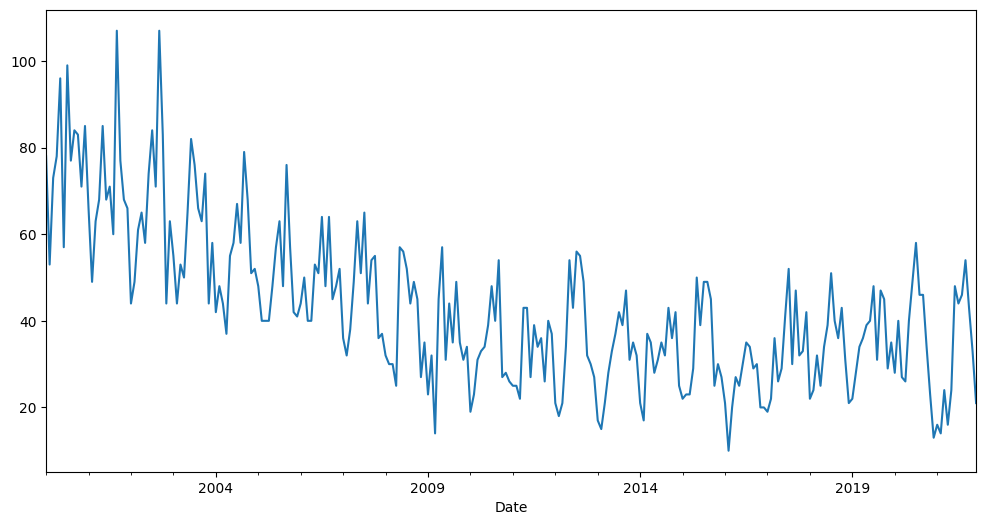

In [67]:
values.plot(figsize=(12,6))

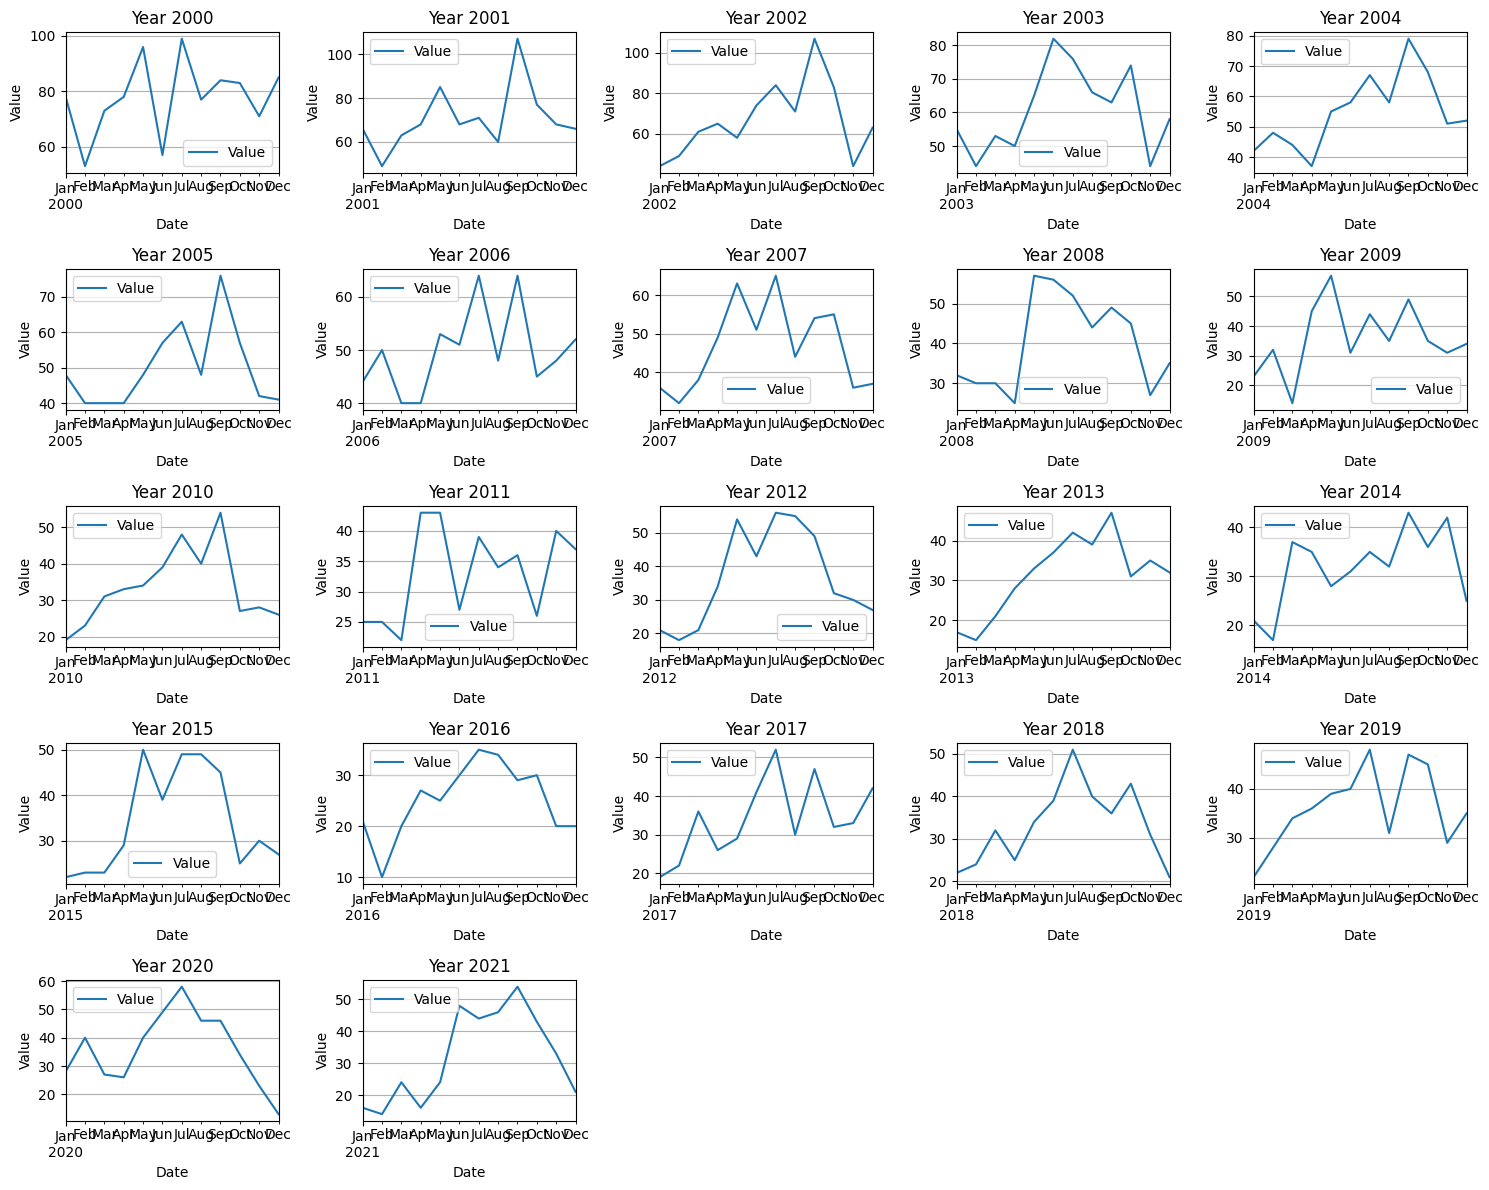

In [68]:
# Group the data by year
grouped = filtered_df_sorted.groupby(filtered_df_sorted.index.year)

num_years = len(grouped)
num_rows = 5
num_cols = 5
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 12))

axes = axes.flatten()

for i, (year, group) in enumerate(grouped):
    ax = axes[i]
    group.plot(ax=ax, y='Value')
    ax.set_title(f'Year {year}')
    ax.set_ylabel('Value')
    ax.set_xlabel('Date')
    ax.grid()

# Hide any empty subplots
for j in range(num_years, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

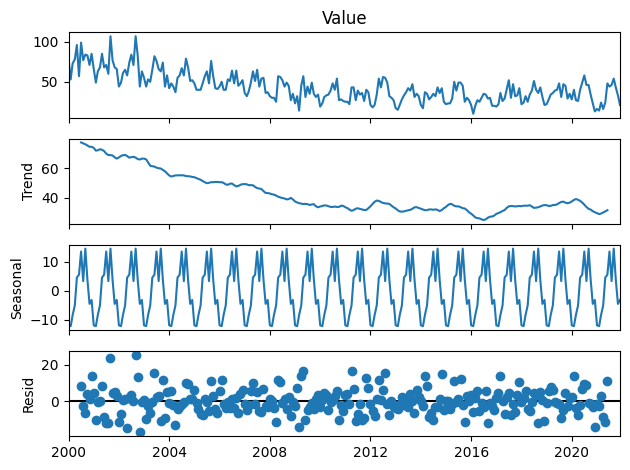

In [69]:
results = seasonal_decompose(filtered_df_sorted['Value'])
results.plot();

In [70]:
train_data = filtered_df_sorted[filtered_df_sorted['Year'] <= 2020]
test_data = filtered_df_sorted[filtered_df_sorted['Year'] > 2020]

In [71]:
train = train_data[['Value']]
train

,Value
Date,
2000-01-01,78.0
2000-02-01,53.0
2000-03-01,73.0
2000-04-01,78.0
2000-05-01,96.0
...,...
2020-08-01,46.0
2020-09-01,46.0
2020-10-01,34.0


In [72]:
test = test_data[['Value']]
test

,Value
Date,
2021-01-01,16.0
2021-02-01,14.0
2021-03-01,24.0
2021-04-01,16.0
2021-05-01,24.0
2021-06-01,48.0
2021-07-01,44.0
2021-08-01,46.0
2021-09-01,54.0


In [73]:
len(train)

252

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [75]:
scaler.fit(train) #take the min and max of the training values
#transform the min and max values
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [76]:
scaled_train[:10]

array([[0.70103093],
       [0.44329897],
       [0.64948454],
       [0.70103093],
       [0.88659794],
       [0.48453608],
       [0.91752577],
       [0.69072165],
       [0.7628866 ],
       [0.75257732]])

In [77]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [78]:
# define generator
n_input = 12 # Number of time steps to consider for each input sequence
n_features = 1 # Number of features (in this case, it's univariate, so just 1 feature)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
#the input time series data, in this case, scaled_train
#targets: The target values corresponding to the input data, also scaled_train
#length: The length of the input sequences, which is n_input in your case. This determines how many time steps each input sequence contains.
#batch_size: The number of input sequences to include in each batch for training. In your code, it's set to 1, meaning each batch contains a single input sequence.

In [79]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.70103093 0.44329897 0.64948454 0.70103093 0.88659794 0.48453608
 0.91752577 0.69072165 0.7628866  0.75257732 0.62886598 0.77319588]
Predict this y: 
 [[0.57731959]]


In [80]:
X,y = generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.44329897 0.64948454 0.70103093 0.88659794 0.48453608 0.91752577
 0.69072165 0.7628866  0.75257732 0.62886598 0.77319588 0.57731959]
Predict this y: 
 [[0.40206186]]


In [81]:
X.shape

(1, 12, 1)

1 row, 12 columns, dimensionality of the number of features

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import Adam

In [84]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
optimizer = Adam(learning_rate=0.001) #out of 0.1, 0.01 and 0.001
model.compile(optimizer=optimizer, loss='mse')

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [86]:
# fit model
#generator has the input and the outout for training the model
model.fit(generator,epochs=50)

Epoch 1/50
240/240 [==============================] - 3s 8ms/step - loss: 0.0215
Epoch 2/50
240/240 [==============================] - 2s 7ms/step - loss: 0.0149
Epoch 3/50
240/240 [==============================] - 2s 9ms/step - loss: 0.0140
Epoch 4/50
240/240 [==============================] - 2s 7ms/step - loss: 0.0133
Epoch 5/50
240/240 [==============================] - 2s 7ms/step - loss: 0.0131
Epoch 6/50
240/240 [==============================] - 2s 7ms/step - loss: 0.0116
Epoch 7/50
240/240 [==============================] - 2s 7ms/step - loss: 0.0127
Epoch 8/50
240/240 [==============================] - 2s 10ms/step - loss: 0.0108
Epoch 9/50
240/240 [==============================] - 2s 8ms/step - loss: 0.0118
Epoch 10/50
240/240 [==============================] - 2s 7ms/step - loss: 0.0107
Epoch 11/50
240/240 [==============================] - 3s 12ms/step - loss: 0.0101
Epoch 12/50
240/240 [==============================] - 2s 7ms/step - loss: 0.0105
Epoch 13/50
240/240 [==

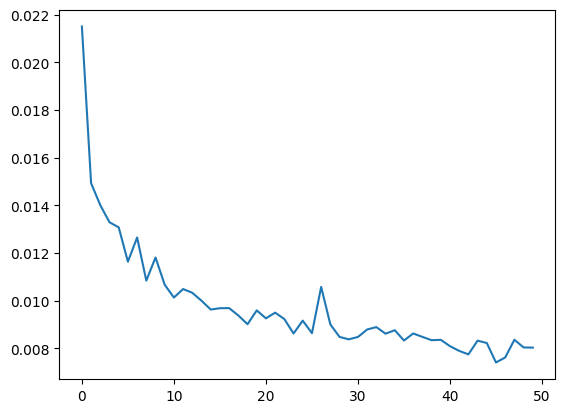

In [87]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [44]:
last_train_batch = scaled_train[-12:]

take the last one year, year 2020, to make a prediction for the first value of the test set

In [45]:
last_train_batch

array([[0.18556701],
       [0.30927835],
       [0.17525773],
       [0.16494845],
       [0.30927835],
       [0.40206186],
       [0.49484536],
       [0.37113402],
       [0.37113402],
       [0.24742268],
       [0.13402062],
       [0.03092784]])

In [46]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [47]:
last_train_batch

array([[[0.18556701],
        [0.30927835],
        [0.17525773],
        [0.16494845],
        [0.30927835],
        [0.40206186],
        [0.49484536],
        [0.37113402],
        [0.37113402],
        [0.24742268],
        [0.13402062],
        [0.03092784]]])

reshape the data as how the model is trained

In [48]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 209ms/step


array([[0.13090247]], dtype=float32)

In [49]:
scaled_test[0]

array([0.06185567])

In [50]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 23ms/step


In [51]:
test_predictions

[array([0.13090247], dtype=float32),
 array([0.1761663], dtype=float32),
 array([0.17198828], dtype=float32),
 array([0.19217975], dtype=float32),
 array([0.2493664], dtype=float32),
 array([0.2907861], dtype=float32),
 array([0.32558095], dtype=float32),
 array([0.30737734], dtype=float32),
 array([0.2743971], dtype=float32),
 array([0.19857246], dtype=float32),
 array([0.15741742], dtype=float32),
 array([0.13875368], dtype=float32)]

In [52]:
test

,Value
Date,
2021-01-01,16.0
2021-02-01,14.0
2021-03-01,24.0
2021-04-01,16.0
2021-05-01,24.0
2021-06-01,48.0
2021-07-01,44.0
2021-08-01,46.0
2021-09-01,54.0


In [53]:
true_predictions = scaler.inverse_transform(test_predictions)

In [57]:
test.loc[:,'Predictions'] = true_predictions

<ipython-input-57-42c8c9827b42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'Predictions'] = true_predictions


In [58]:
test

,Value,Predictions
Date,,
2021-01-01,16.0,22.697540
2021-02-01,14.0,27.088131
2021-03-01,24.0,26.682863
2021-04-01,16.0,28.641436
2021-05-01,24.0,34.188541
2021-06-01,48.0,38.206250
2021-07-01,44.0,41.581353
2021-08-01,46.0,39.815602
2021-09-01,54.0,36.616519


<Axes: xlabel='Date'>

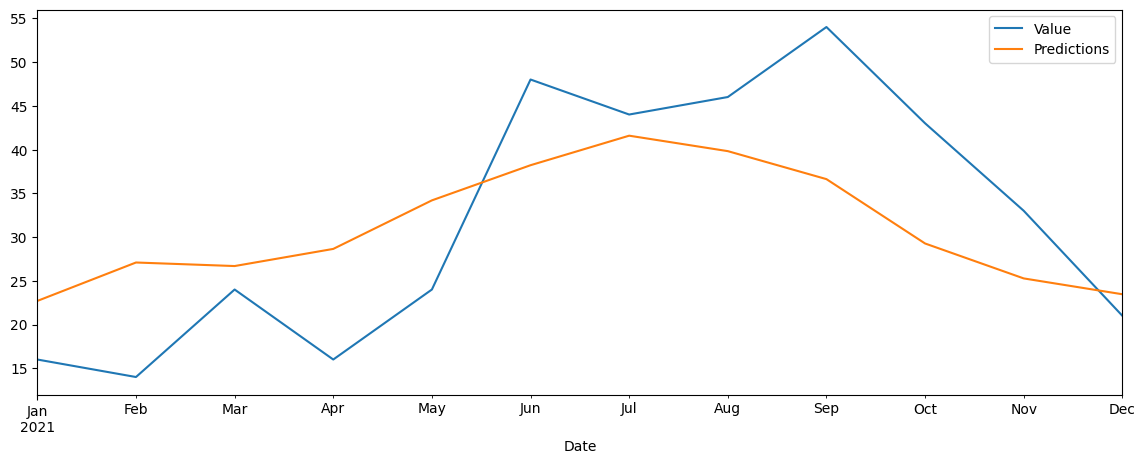

In [59]:
test.plot(figsize=(14,5))

In [60]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Value'],test['Predictions']))
print(rmse)

9.93193254846833
